In [1]:


!pip install mxnet autogluon
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn==1.4.1.post1

In [4]:
#df = pd.read_csv('./heart_2020_cleaned.csv')
#df = pd.read_csv('./heart.csv')
df = pd.read_csv('./dataset.csv')
#df.HeartDisease=df.HeartDisease.replace({'Yes':1,'No':0})

df_train = df.sample(int(0.8*(len(df))), random_state=0)
test_data = df.drop(df_train.index)

from google.colab import drive
df_train.to_csv('./train.csv', index=False)
test_data.to_csv('./test.csv', index=False)

train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')


from sklearn.preprocessing import MinMaxScaler,StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()

clean_df = df

clean_df['age'] = mms.fit_transform(clean_df[['age']])
clean_df['chol'] = mms.fit_transform(clean_df[['chol']])

clean_df_train = clean_df.sample(int(0.8*(len(clean_df))), random_state=0)

clean_test_data = clean_df.drop(clean_df_train.index)
clean_df_train.to_csv('./clean_train.csv', index=False)
clean_test_data.to_csv('./clean_test.csv', index=False)
clean_train_data = pd.read_csv('./clean_train.csv')
clean_test_data = pd.read_csv('./clean_test.csv')

df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.966997,131.623762,0.274575,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,0.189210,0.466011,1.032052,17.538143,0.118335,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,120.000000,0.194064,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.541667,1.000000,1.000000,130.000000,0.260274,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,0.666667,1.000000,2.000000,140.000000,0.339041,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,200.000000,1.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


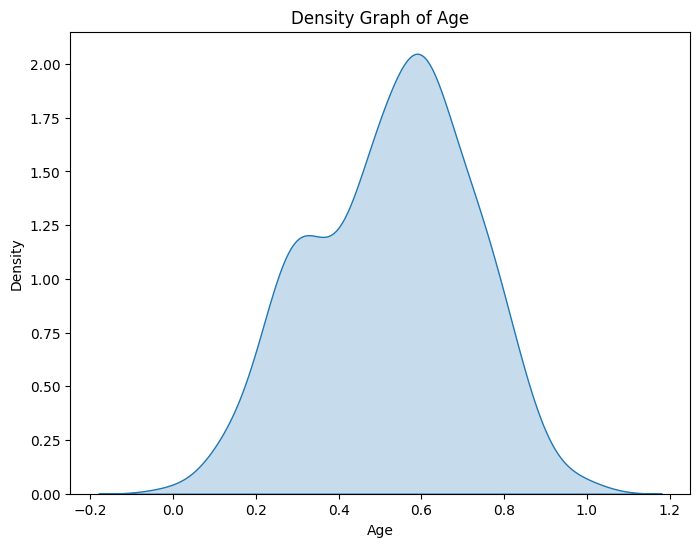

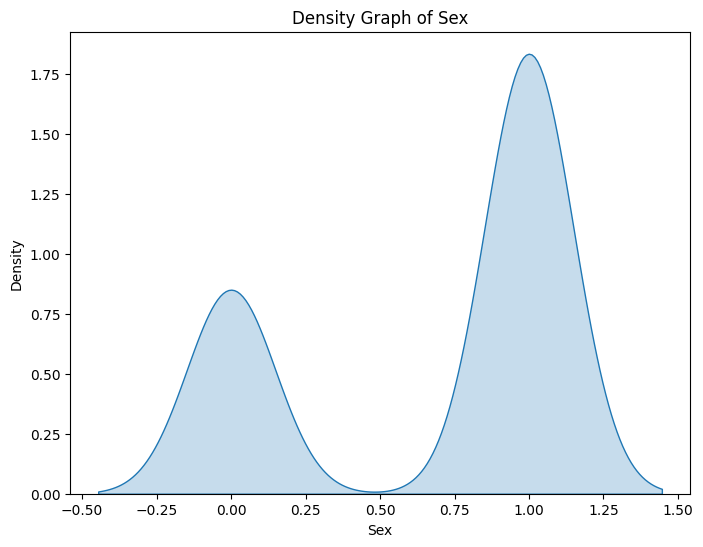

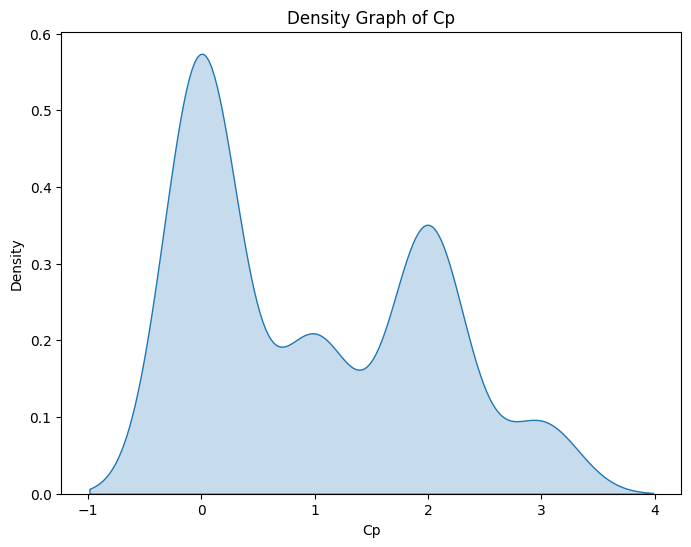

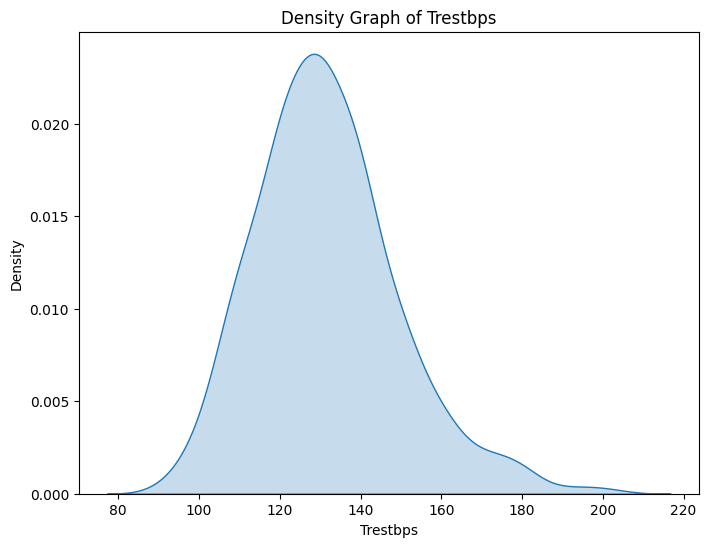

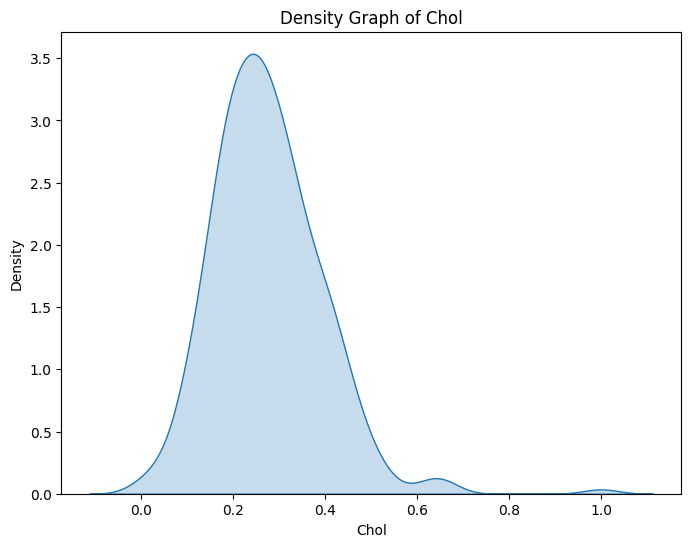

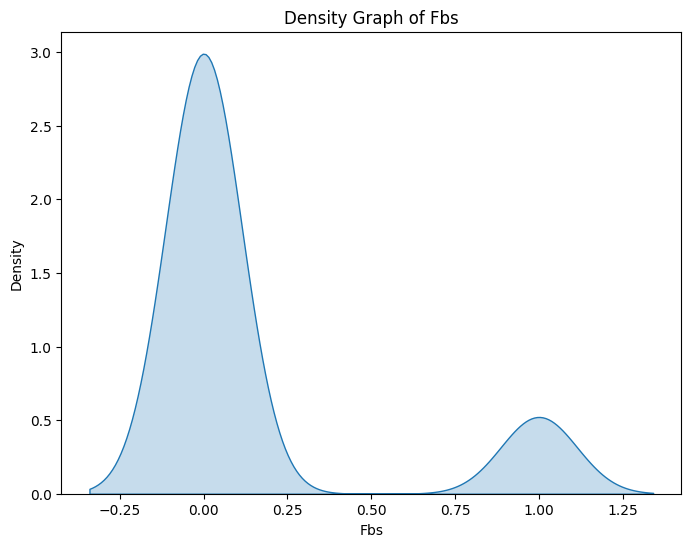

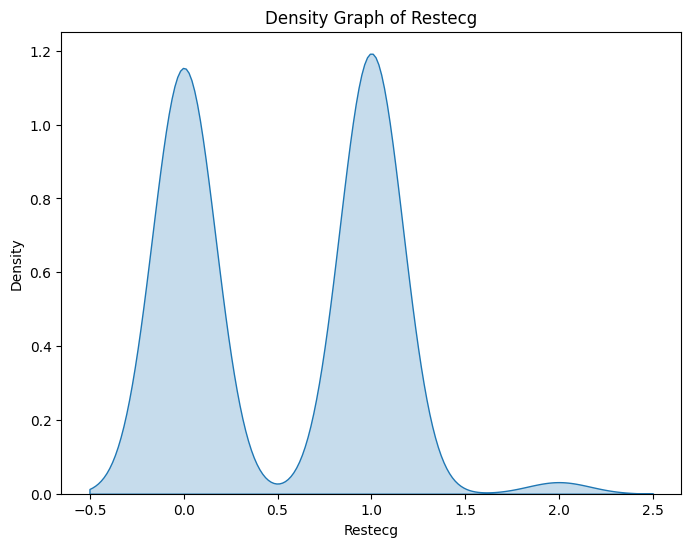

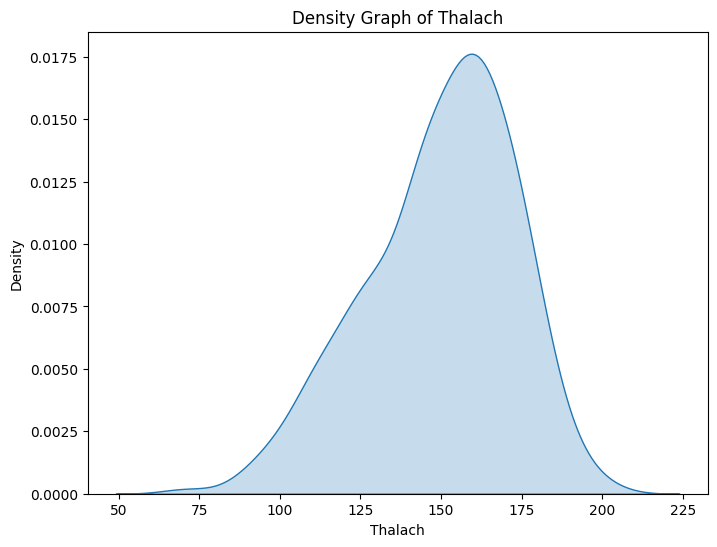

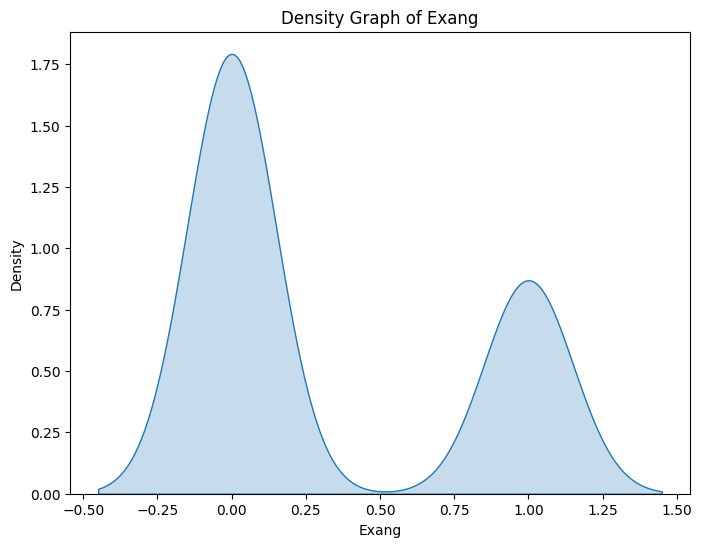

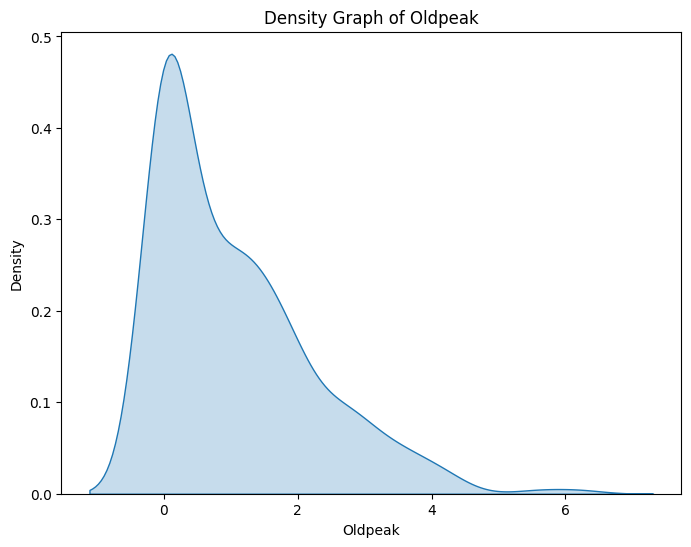

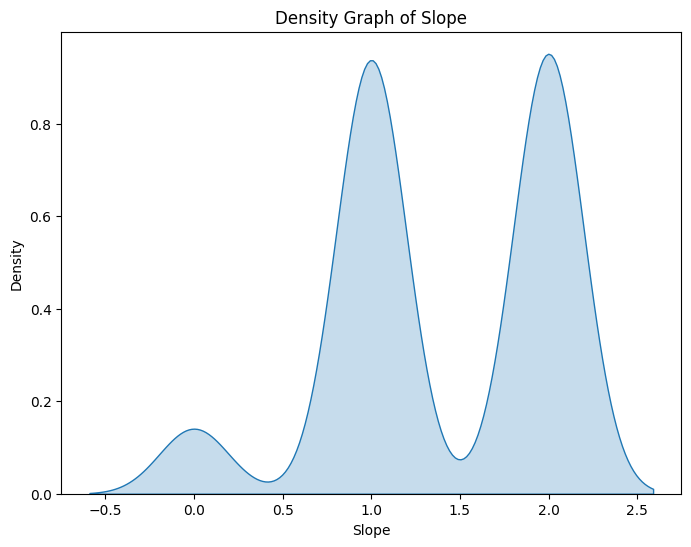

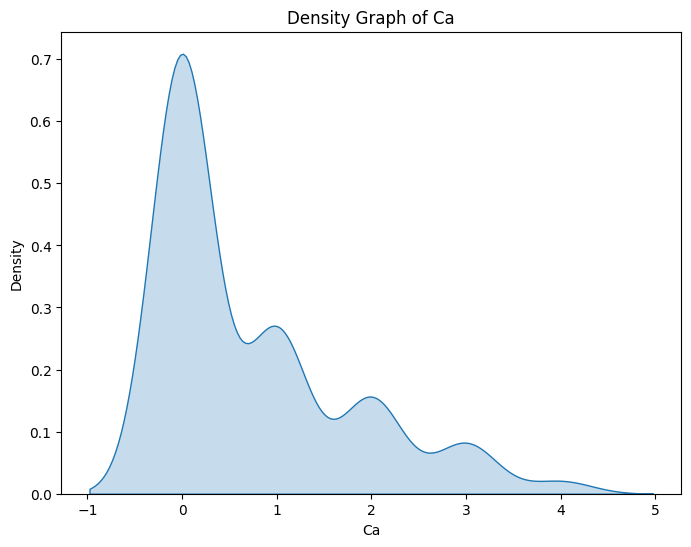

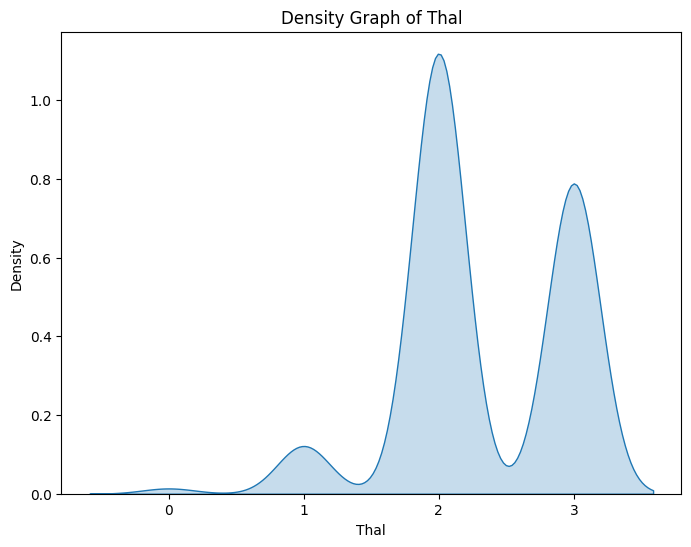

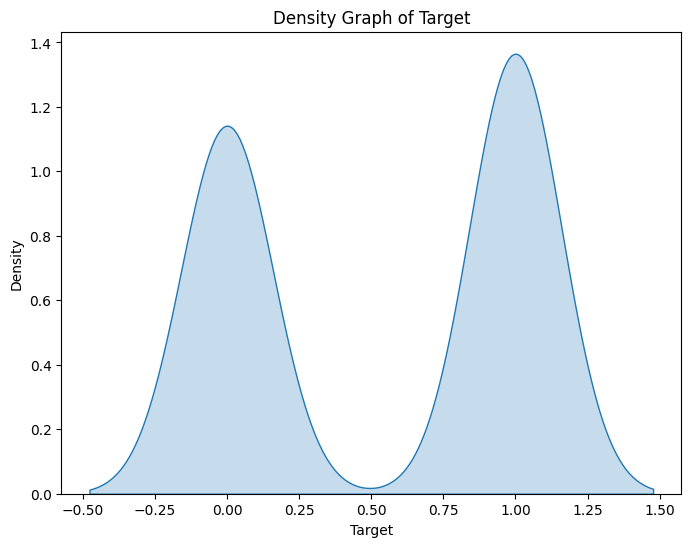

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Loop through each column
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=column, fill=True)
    plt.title(f"Density Graph of {column.capitalize()}", fontsize=12)
    plt.xlabel(column.capitalize(), fontsize=10)
    plt.ylabel("Density", fontsize=10)
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# 'target' is the column name of the target variable

# Iterate over each column except 'target'
for column in df.columns[:-1]:  # Exclude the last column (target)
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.kdeplot(data=df, x=column, hue='target', fill=True, common_norm=False)  # Plot the density graph
    plt.title(f'Density Graph of {column} by Target')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Density')  # Set the y-axis label
    plt.legend(title='Target', labels=['No Disease', 'Has Disease'])  # Set the legend
    plt.show()  # Show the plot

In [ ]:
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["target"], palette= cols)

In [ ]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = df.corr()
plt.subplots(figsize=(14,14))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [ ]:
plt.figure(figsize=(15,10))
Days_of_week=sns.countplot(x=df['age'],data=df, hue ="target",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

In [10]:

from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset(train_data)
test_data = TabularDataset(test_data)
clean_train_data = TabularDataset(clean_train_data)
clean_test_data = TabularDataset(clean_test_data)

#predictor = TabularPredictor(label='target',problem_type='binary',eval_metric='accuracy').fit(clean_train_data, presets='best_quality',time_limit=3600,num_bag_folds=5,num_bag_sets=1, num_stack_levels=3)
#predictor = TabularPredictor(label='target',problem_type='binary',eval_metric='f1').fit(clean_train_data, presets='best_quality',time_limit=3600,num_bag_folds=5,num_bag_sets=1, num_stack_levels=3)

predictor = TabularPredictor.load('/content/drive/MyDrive/FYP/AutogluonModels/ag-20240316_164611')

In [11]:
predictor.leaderboard(clean_test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest_r195_BAG_L2,0.892308,0.879121,f1,5.278464,3.678832,697.123766,0.089141,0.184843,2.101745,2,True,61
1,ExtraTrees_r42_BAG_L2,0.892308,0.890511,f1,5.280084,3.617706,696.248484,0.090762,0.123717,1.226463,2,True,57
2,NeuralNetTorch_BAG_L2,0.892308,0.871429,f1,5.289355,3.643352,723.021162,0.100032,0.149363,27.999142,2,True,47
3,NeuralNetTorch_r22_BAG_L2,0.892308,0.884892,f1,5.302747,3.689527,725.042325,0.113424,0.195539,30.020305,2,True,55
4,NeuralNetTorch_r79_BAG_L2,0.892308,0.887273,f1,5.314605,3.602548,720.807109,0.125282,0.108559,25.785089,2,True,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NeuralNetFastAI_r145_BAG_L1,0.828571,0.881119,f1,0.125303,0.135538,28.769222,0.125303,0.135538,28.769222,1,True,28
102,RandomForest_r195_BAG_L1,0.825397,0.808664,f1,0.065654,0.597195,2.446111,0.065654,0.597195,2.446111,1,True,26
103,XGBoost_BAG_L1,0.823529,0.846715,f1,0.376893,0.056745,22.195546,0.376893,0.056745,22.195546,1,True,11
104,KNeighborsDist_BAG_L1,0.741935,0.678571,f1,0.066592,0.016481,0.010817,0.066592,0.016481,0.010817,1,True,2


In [12]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L4,0.914286,f1,6.154721,1421.968803,0.003135,6.557124,4,True,91
1,LightGBM_BAG_L2,0.911765,f1,3.516507,717.557842,0.022519,22.535821,2,True,39
2,WeightedEnsemble_L5,0.911765,f1,3.519595,725.709360,0.003088,8.151518,5,True,106
3,WeightedEnsemble_L3,0.911765,f1,3.520091,726.094651,0.003584,8.536809,3,True,65
4,XGBoost_r33_BAG_L3,0.909091,f1,5.950897,1381.893258,0.036540,15.982866,3,True,84
...,...,...,...,...,...,...,...,...,...,...
101,RandomForestEntr_BAG_L1,0.836879,f1,0.101498,0.943461,0.101498,0.943461,1,True,6
102,RandomForestGini_BAG_L1,0.833333,f1,0.175955,0.996794,0.175955,0.996794,1,True,5
103,RandomForest_r195_BAG_L1,0.808664,f1,0.597195,2.446111,0.597195,2.446111,1,True,26
104,KNeighborsUnif_BAG_L1,0.695035,f1,0.017577,0.015320,0.017577,0.015320,1,True,1


In [13]:
results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                           model  score_val eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            WeightedEnsemble_L4   0.914286          f1       6.154721  1421.968803                0.003135           6.557124            4       True         91
1                LightGBM_BAG_L2   0.911765          f1       3.516507   717.557842                0.022519          22.535821            2       True         39
2            WeightedEnsemble_L5   0.911765          f1       3.519595   725.709360                0.003088           8.151518            5       True        106
3            WeightedEnsemble_L3   0.911765          f1       3.520091   726.094651                0.003584           8.536809            3       True         65
4             XGBoost_r33_BAG_L3   0.909091          f1       5.950897  1381.893258                0.036540          15.982866  

In [31]:
predictor.features()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [14]:
result = predictor.evaluate(clean_test_data)
#result = predictor.evaluate(test_data)
print(result)

{'f1': 0.8787878787878788, 'accuracy': 0.8688524590163934, 'balanced_accuracy': 0.8677419354838709, 'mcc': 0.7435221847913162, 'roc_auc': 0.8806451612903226, 'precision': 0.8285714285714286, 'recall': 0.9354838709677419}


In [15]:
feature_importance = predictor.feature_importance(clean_test_data)
print(feature_importance)

          importance    stddev   p_value  n  p99_high   p99_low
cp          0.121770  0.026880  0.000267  5  0.177117  0.066423
ca          0.109052  0.044454  0.002690  5  0.200583  0.017520
thal        0.042841  0.020199  0.004510  5  0.084432  0.001250
thalach     0.031235  0.010953  0.001551  5  0.053788  0.008683
sex         0.023153  0.013743  0.009828  5  0.051451 -0.005145
exang       0.016410  0.010775  0.013570  5  0.038597 -0.005776
oldpeak     0.013933  0.030167  0.180039  5  0.076047 -0.048182
trestbps    0.013800  0.007714  0.008065  5  0.029683 -0.002084
slope       0.012227  0.020799  0.129487  5  0.055052 -0.030598
chol        0.007870  0.007184  0.035242  5  0.022662 -0.006922
restecg     0.007793  0.011581  0.103434  5  0.031638 -0.016053
age         0.007564  0.016784  0.185302  5  0.042124 -0.026995
fbs         0.002623  0.005866  0.186950  5  0.014701 -0.009454


In [34]:
feature_metadata = predictor.feature_metadata
print(feature_metadata)

('float', [])     : 3 | ['age', 'chol', 'oldpeak']
('int', [])       : 7 | ['cp', 'trestbps', 'restecg', 'thalach', 'slope', ...]
('int', ['bool']) : 3 | ['sex', 'fbs', 'exang']
